### Importação das bibliotecas

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [12]:
url = "https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv"
sales_data = pd.read_csv(url)

### Visualizar as variaveis

In [13]:
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


### Visualizar os dados

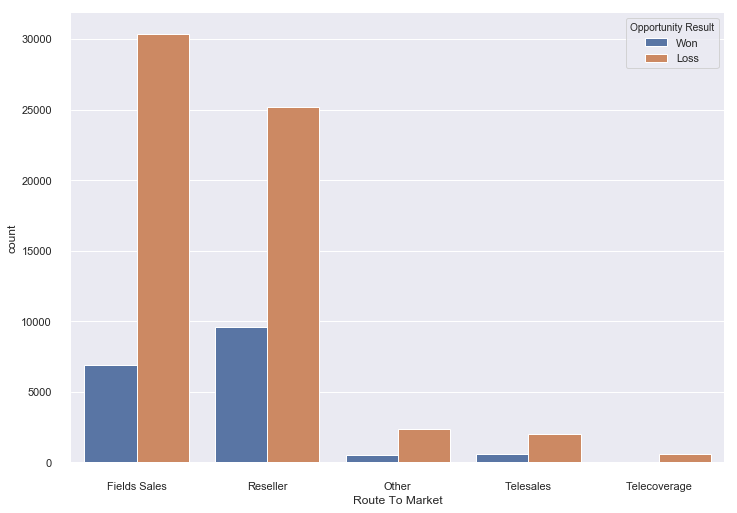

In [14]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')

sns.despine(offset=10, trim=True)


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


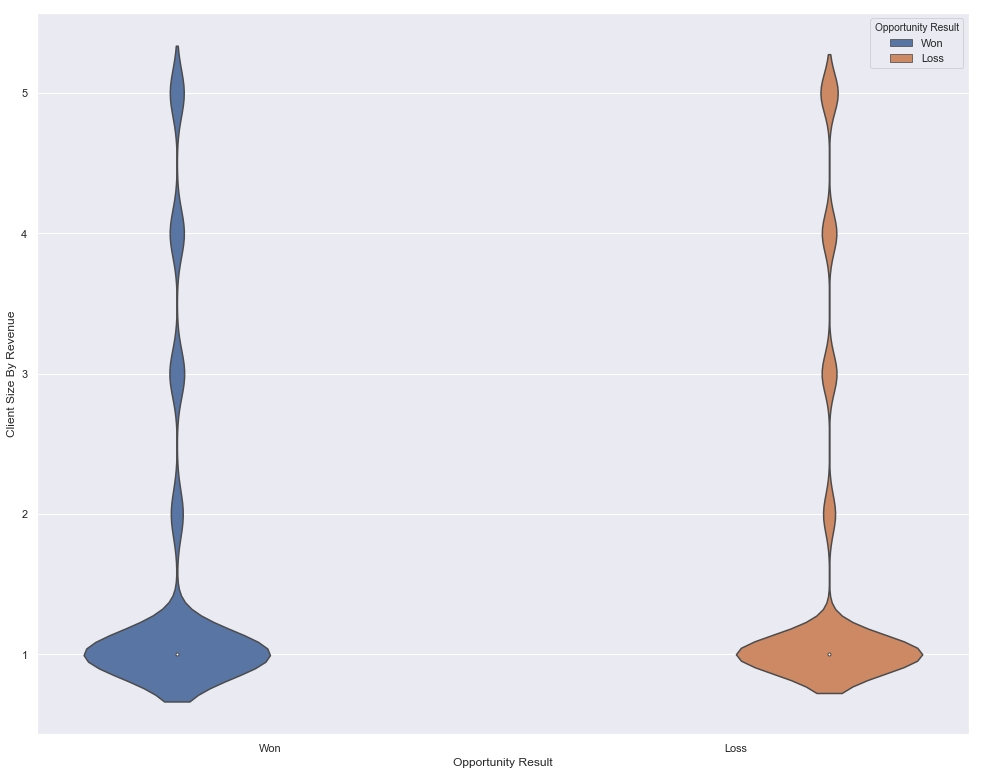

In [15]:
sns.set(rc={'figure.figsize':(16.7,13.27)})
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
plt.show()

In [20]:
numeric_features = sales_data.select_dtypes(include=[np.number])
numeric_features.dtypes

Opportunity Number                           int64
Elapsed Days In Sales Stage                  int64
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

In [22]:
corr = numeric_features.corr()
print (corr['Opportunity Amount USD'].sort_values(ascending=False)[:10], '\n')
print (corr['Opportunity Amount USD'].sort_values(ascending=False)[-10:])

Opportunity Amount USD                     1.000000
Deal Size Category                         0.763637
Revenue From Client Past Two Years         0.097925
Total Days Identified Through Qualified    0.078204
Total Days Identified Through Closing      0.077330
Ratio Days Identified To Total Days        0.067238
Client Size By Revenue                     0.062045
Client Size By Employee Count              0.054670
Sales Stage Change Count                   0.050513
Ratio Days Qualified To Total Days         0.046593
Name: Opportunity Amount USD, dtype: float64 

Total Days Identified Through Qualified    0.078204
Total Days Identified Through Closing      0.077330
Ratio Days Identified To Total Days        0.067238
Client Size By Revenue                     0.062045
Client Size By Employee Count              0.054670
Sales Stage Change Count                   0.050513
Ratio Days Qualified To Total Days         0.046593
Elapsed Days In Sales Stage               -0.013481
Opportunity Numbe

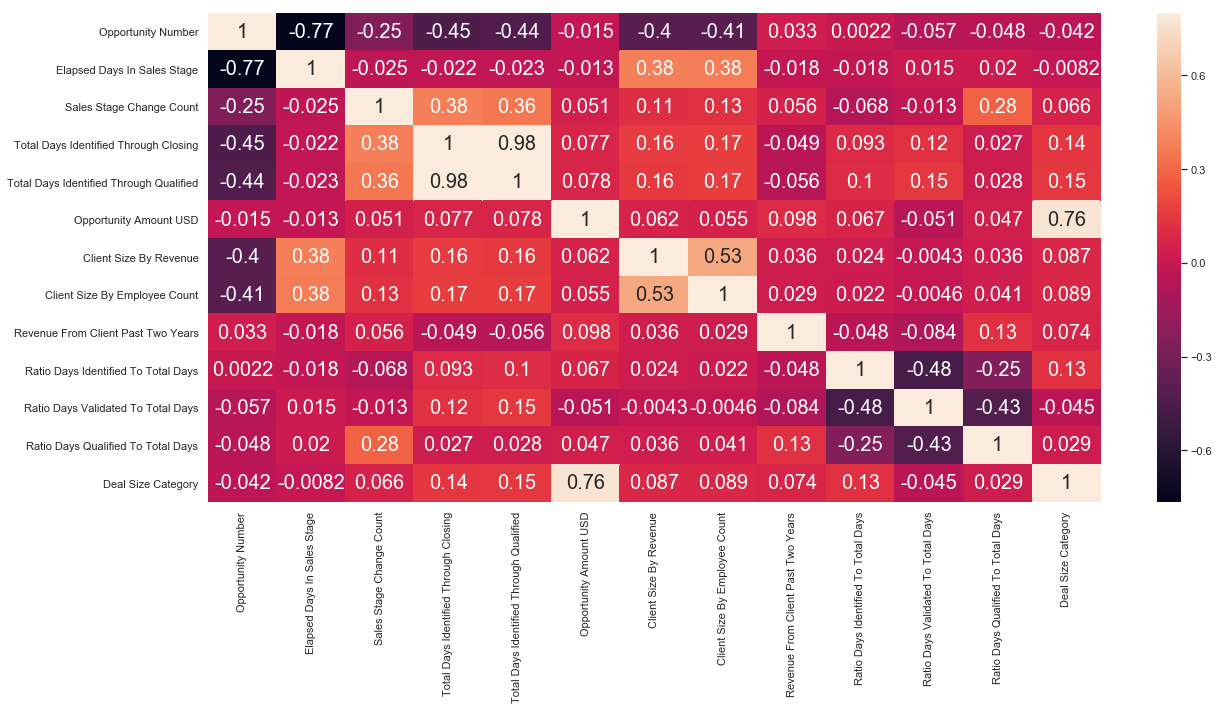

In [23]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);